In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.dates as mdates
from pandas.tseries.offsets import DateOffset

/home/maltem/.local/lib/python3.10/site-packages/pandas/core/arrays/masked.py:62: UserWarning: Pandas requires version '1.3.4' or newer of 'bottleneck' (version '1.3.2' currently installed).
  from pandas.core import (


## Read data

In [3]:
date_postfix=20230226

# Data from Infrared Sensor
file_path='data/calibration/CR1000-koffert_IR120Data-Calibration-Blindern_20240307.dat'
df = pd.read_csv(file_path, skiprows=[0, 2, 3], parse_dates=['TIMESTAMP'], index_col='TIMESTAMP')

# Data from Logger
file_path2 = 'data/calibration/calibrated_temperature_sensors_RockBLOCK_211638_Temp.csv'
file_path2 = 'data/calibration/calibrated_temperature_sensors_KVS-01_20240307.csv'

df2 = pd.read_csv(file_path2, parse_dates=['timestamps'], index_col='timestamps')

if (False):

    start_time = pd.to_datetime('2024-02-26 15:00')
    end_time   = pd.to_datetime('2024-02-27 15:00')
    
elif (True):
    start_time = pd.to_datetime('2024-03-07 8:00')
    end_time   = pd.to_datetime('2024-03-11 0:00')
    
df = df[df.index >= start_time]
df2 = df2[df2.index >= start_time]
df = df[df.index <= end_time]
df2 = df2[df2.index <= end_time]

df = df[df.index <= end_time]

# Verschieben von df1 um +1 Stunde
df_shifted = df.index + DateOffset(hours=-1.3)
df.index = df_shifted

file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_7_A_QLO_CalibrationPart2.csv'
df3 = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df3.index = pd.to_datetime(df3.index).tz_convert('UTC')
start_time = pd.to_datetime('2024-02-26 15:00+00:00')
end_time   = pd.to_datetime('2024-02-27 15:00+00:00')
df3 = df3[df3.index >= start_time]
df3 = df3[df3.index <= end_time]
sigma = 5.67*10**(-8)
Tsurface = (np.array(df3['Value'].values)/sigma)**(1/4)

In [4]:
df2

,Unnamed: 0,thermistor_0_id_47,thermistor_1_id_30,thermistor_2_id_25,thermistor_3_id_10,calibrated_thermistor_0_id_47,calibrated_thermistor_1_id_30,calibrated_thermistor_2_id_25,calibrated_thermistor_3_id_10
timestamps,,,,,,,,,
2024-03-07 11:02:48,0,0.2500,0.1250,0.5000,0.1250,0.067650,0.155014,0.429824,0.062915
2024-03-07 11:30:56,1,0.2500,0.2500,0.8125,0.1875,0.067650,0.281713,0.746891,0.126333
2024-03-07 12:00:57,2,0.3125,0.2500,1.3125,0.1875,0.131215,0.281713,1.254200,0.126333
2024-03-07 12:30:44,3,0.3125,0.3125,1.7500,0.2500,0.131215,0.345062,1.698094,0.189750
2024-03-07 13:00:55,4,0.3125,0.1875,1.6250,0.3750,0.131215,0.218364,1.571267,0.316585
...,...,...,...,...,...,...,...,...,...
2024-03-10 21:30:54,165,-2.3125,-2.3750,-2.0625,-1.8125,-2.538503,-2.378952,-2.170131,-1.903025
2024-03-10 22:00:56,166,-2.3750,-2.3750,-2.0625,-1.8750,-2.602067,-2.378952,-2.170131,-1.966442
2024-03-10 22:30:45,167,-2.4375,-2.4375,-2.1875,-1.8750,-2.665632,-2.442301,-2.296958,-1.966442


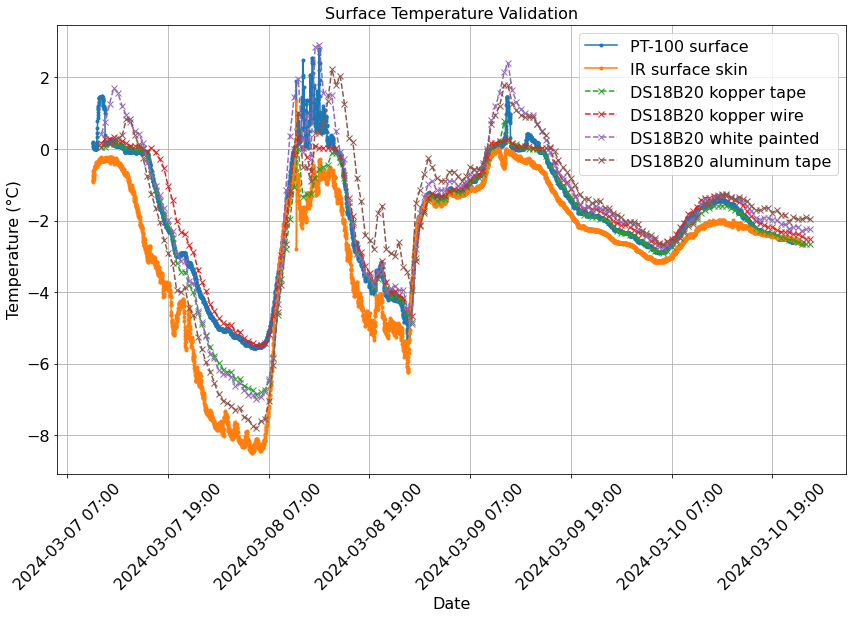

In [12]:




# Erstellung des Plots für 'Atmtemp_Avg'
plt.figure(figsize=(12, 8))
plt.plot(df.index.values,np.array(df['PT100_temp_Avg'].values), marker='.', linestyle='-', label='PT-100 surface')
plt.plot(df.index.values,np.array(df['IR_sensorTempTCE098'].values), marker='.', linestyle='-', label='IR surface skin')
# Hinzufügen von 'calibrated_thermistor_0_id_51' aus der zweiten Datei zum selben Plot
plt.plot(df2.index.values, df2['calibrated_thermistor_0_id_47'].values, marker='x', linestyle='--', label='DS18B20 kopper tape')
plt.plot(df2.index.values, df2['calibrated_thermistor_1_id_30'].values, marker='x', linestyle='--', label='DS18B20 kopper wire')
plt.plot(df2.index.values, df2['calibrated_thermistor_2_id_25'].values, marker='x', linestyle='--', label='DS18B20 white painted')
plt.plot(df2.index.values, df2['calibrated_thermistor_3_id_10'].values, marker='x', linestyle='--', label='DS18B20 aluminum tape')
#plt.plot(df3.index.values, Tsurface-273.15, marker='.', linestyle='--', label='From Apoge Radiation')





plt.title('Surface Temperature Validation',fontsize=16)
plt.xlabel('Date',fontsize=16)
plt.ylabel('Temperature (°C)',fontsize=16)
plt.grid(True)
plt.xticks(rotation=45,fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.tight_layout()
# Formatierung der X-Achse
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
plt.gca().xaxis.set_major_locator(mdates.HourLocator(interval=12))
# Anzeigen des Plots
plt.show()

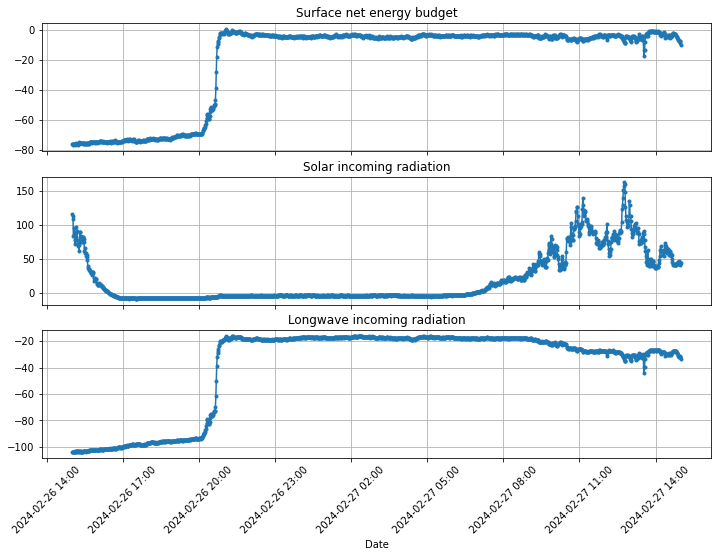

In [125]:


fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
start_time = pd.to_datetime('2024-02-26 15:00+00:0start_time = pd.to_datetime('2024-02-26 15:00+00:00')
end_time   = pd.to_datetime('2024-02-27 15:00+00:00')0')
end_time   = pd.to_datetime('2024-02-27 15:00+00:00')



file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_29_C_QLNet_CalibrationPart2.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.index = pd.to_datetime(df.index).tz_convert('UTC')
df = df[df.index >= start_time]
df = df[df.index <= end_time]
axs[0].plot(df.index.values,np.array(df['Value'].values), marker='.', linestyle='-', label='PT-100 Steinar')
axs[0].grid(True)
axs[0].set_title('Surface net energy budget')



file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_15_C_QSI_CalibrationPart2.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.index = pd.to_datetime(df.index).tz_convert('UTC')
df = df[df.index >= start_time]
df = df[df.index <= end_time]
axs[1].plot(df.index.values,np.array(df['Value'].values), marker='.', linestyle='-', label='PT-100 Steinar')
axs[1].grid(True)
axs[1].set_title('Solar incoming radiation')

file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_17_C_QLIraw_CalibrationPart2.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.index = pd.to_datetime(df.index).tz_convert('UTC')
df = df[df.index >= start_time]
df = df[df.index <= end_time]
axs[2].plot(df.index.values,np.array(df['Value'].values), marker='.', linestyle='-', label='PT-100 Steinar')
axs[2].grid(True)
axs[2].set_title('Longwave incoming radiation')

axs[2].set_xlabel('Date')
#plt.ylabel('Temperature (°C)')
for label in axs[2].get_xticklabels():
    label.set_rotation(45)

# Formatierung der X-Achse
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=3))




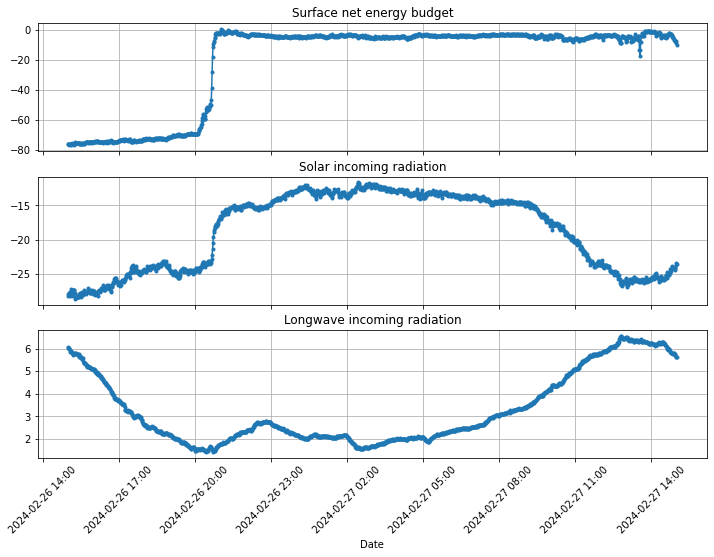

In [145]:


fig, axs = plt.subplots(3, 1, figsize=(12, 8), sharex=True)
start_time = pd.to_datetime('2024-02-26 15:00+00:00')
end_time   = pd.to_datetime('2024-02-27 15:00+00:00')


file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_29_C_QLNet_CalibrationPart2.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.index = pd.to_datetime(df.index).tz_convert('UTC')
df = df[df.index >= start_time]
df = df[df.index <= end_time]
axs[0].plot(df.index.values,np.array(df['Value'].values), marker='.', linestyle='-', label='PT-100 Steinar')
axs[0].grid(True)
axs[0].set_title('Surface net energy budget')

file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_18_C_QLOraw_CalibrationPart2.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.index = pd.to_datetime(df.index).tz_convert('UTC')
df = df[df.index >= start_time]
df = df[df.index <= end_time]
axs[1].plot(df.index.values,np.array(df['Value'].values), marker='.', linestyle='-', label='PT-100 Steinar')
axs[1].grid(True)
axs[1].set_title('Solar incoming radiation')

file_path='../2023_OMB_Malte_thermistors/MetNo_measurement_station/blindern_data_0_19_C_TIQL_CalibrationPart2.csv'
df = pd.read_csv(file_path, parse_dates=['Timestamp'], index_col='Timestamp')
df.index = pd.to_datetime(df.index).tz_convert('UTC')
df = df[df.index >= start_time]
df = df[df.index <= end_time]
axs[2].plot(df.index.values,np.array(df['Value'].values), marker='.', linestyle='-', label='PT-100 Steinar')
axs[2].grid(True)
axs[2].set_title('Longwave incoming radiation')

axs[2].set_xlabel('Date')
#plt.ylabel('Temperature (°C)')
for label in axs[2].get_xticklabels():
    label.set_rotation(45)

# Formatierung der X-Achse
axs[2].xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d %H:%M'))
axs[2].xaxis.set_major_locator(mdates.HourLocator(interval=3))

